w (linearity):
[[-5.03620188]
 [58.29971644]]


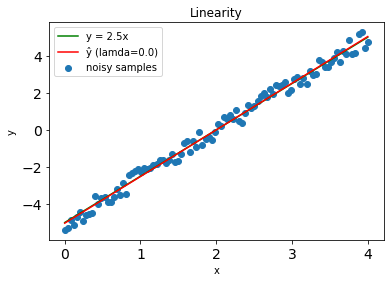

w (nonlinearity):
[[  0.91735819]
 [ 37.60830109]
 [-67.31728987]
 [-40.45243482]
 [ 58.60971092]]


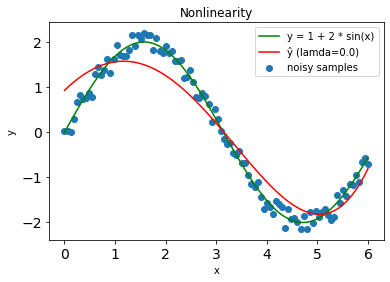

In [83]:
import numpy as np
from matplotlib import pyplot as plt

"""
Linear regression by gradient descent
"""
class RegressionGD(object):
    def cost(self, X, y, w):
        """
        Cost function for linear regression
        """
        n = np.size(y)

        t = X.dot(w)
        L = float((1./(2*n)) * (t - y).T.dot(t - y))   
        return L;


    def cost_reg(self, X, y, w, lamda = 10):
        """
        Cost function for ridge regression
        """
        n = np.size(y) 
        L = 0

        t = X.dot(w)
        L_reg = (lamda / (2*n)) * np.sum(np.square(w))
        L = float((1./(2*n)) * (t - y).T.dot((t - y))) + L_reg
        return L


    def gradient_descent(self, X, y, w, eta = 0.0005, num_iters = 1000):
        """
        Gradient descent for linear regression
        """
        n = np.size(y)
        L_history = np.zeros(num_iters)
        w_0_hist, w_1_hist = [], []

        for i in range(num_iters):
            #Cost and intermediate values for each iteration
            L_history[i] = self.cost(X, y, w)
            w_0_hist.append(w[0,0])
            w_1_hist.append(w[1,0])

            #Gradient function in vectorized form
            t = X.dot(w)
            gradient = (1/n)*(X.T.dot(t-y))
            w = w - eta * gradient       
        return w, L_history, w_0_hist, w_1_hist

    def gradient_descent_reg(self, X, y, w, eta = 3.0, lamda = 10, num_iters=1000):
        """
        Gradient descent for ridge regression
        """
        n = np.size(y)
        L_history = np.zeros(num_iters)
        w_0_hist, w_1_hist = [], []

        for i in range(num_iters):
            t = X.dot(w)

            #Gradient function in vectorized form
            w = w - eta * (1/n) * ((X.T.dot(t-y)) + lamda * w)

            #Cost function in vectorized form       
            L_history[i] = self.cost_reg(X, y, w, lamda)

            #Calculate the cost for each iteration(used to plot convergence)
            w_0_hist.append(w[0,0])
            w_1_hist.append(w[1,0])
        return w, L_history, w_0_hist, w_1_hist
    
    def predict(self, X, w):
        return np.dot(X, w)
    
   
if __name__ == '__main__':
    # Create synthetic data for linearity
    x = np.linspace(0, 4, 100)
    noise =  np.random.uniform(size = 100)
    y = 2.5 * x 
    y_noise = (y + noise).reshape(-1,1)

    #Centering the y data
    y_noise = y_noise - y_noise.mean()

    #Design matrix is x (linearity)
    X = np.array([x]).T

    #Nornalizing the design matrix to facilitate visualization
    X = X / np.linalg.norm(X, axis = 0)

    #Add 1 column
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)

    #Computing the gradient descent
    r = RegressionGD()
    w, lost_history, w_0, w_1 = r.gradient_descent(X, y_noise, np.array([7, -10]).reshape(-1,1), eta = 0.5, num_iters=100000)

    print("w (linearity):")
    print(w)

    #Plotting the result
    plt.scatter(x, y_noise, label='noisy samples')
    plt.plot(x, y - y.mean(), 'g', label='y = 2.5x')
    plt.plot(x, r.predict(X, w), 'r', label=u'ŷ (lamda=0.0)')
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.title('Linearity')
    plt.legend()
    plt.show()

    #--------------------------------------------------------
    
    # Create synthetic data for linearity
    x = np.linspace(0, 6, 100)
    noise = 0.5 * np.random.uniform(size = 100)
    y = 1 + 2 * np.sin(x) 
    y_noise = (y + noise).reshape(-1,1)

    #Centering the y data
    y_noise = y_noise - y_noise.mean()

    #Design matrix is x, x^2, x^3, x^4 (nonlinearity)
    X = np.vstack((x, x**2, x**3, x**4)).T

    #Nornalizing the design matrix to facilitate visualization
    X = X / np.linalg.norm(X, axis = 0)

    #Add 1 column
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)

    #Computing the gradient descent
    r = RegressionGD()
    w, lost_history, w_0, w_1 = r.gradient_descent(X, y_noise, np.array([7, -10, 11, 5, 6]).reshape(-1,1), eta = 0.5, num_iters=100000)

    print("w (nonlinearity):")
    print(w)

    #Plotting the result
    plt.scatter(x, y_noise, label='noisy samples')
    plt.plot(x, y - y.mean(), 'g', label='y = 1 + 2 * sin(x)')
    plt.plot(x, r.predict(X, w), 'r', label=u'ŷ (lamda=0.0)')
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.title('Nonlinearity')
    plt.legend()
    plt.show()